In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline




In [2]:
sc.settings.figdir = "sfig10"


/tmp/ipykernel_27080/3522771619.py:19: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_skinccl19only.obs["pcw"] = adata_skinccl19only.obs["DonorID"].map(RENAME)
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / ob

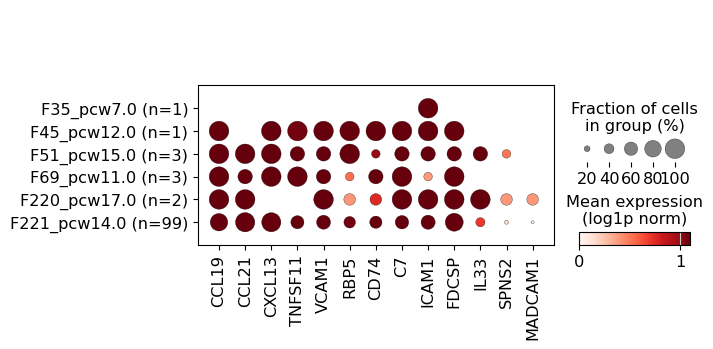

In [3]:
PATH='/nfs/team298/ls34/fibroblast_atlas/fig1/adata_skin_gut_fetalonly.h5ad.integrated'
adata=sc.read_h5ad(PATH)
adata
rename = {"LTo_skin": "CCL19+_skin",
         "Other intestine": "Other_intestine"}
adata.obs["lto"]=adata.obs["lto"].map(rename).fillna(adata.obs["lto"])
adata.obs["lto"].unique()

adata
adata_skinccl19only = adata[adata.obs["lto"]=="CCL19+_skin"]
adata_skinccl19only
RENAME={'F35': '7.0',
        'F45': '12.0', 
        'F51': '15.0', 
        'F69': '11.0', 
        'F220': '17.0', 
        'F221': '14.0'}

adata_skinccl19only.obs["pcw"] = adata_skinccl19only.obs["DonorID"].map(RENAME)
adata_skinccl19only.obs["pcw"].value_counts()
adata_skinccl19only.obs["Donor_plus_time"] = adata_skinccl19only.obs["DonorID"].astype(str) + \
                                                    "_pcw" + \
                                                adata_skinccl19only.obs["pcw"].astype(str)
group_counts = adata_skinccl19only.obs["Donor_plus_time"].value_counts()
adata_skinccl19only.obs["Donor_plus_time_with_counts"] = adata_skinccl19only.obs["Donor_plus_time"].apply(
    lambda x: f"{x} (n={group_counts[x]})"
)

# Define the desired order for the 'lto' categories
desired_order = ['CCL19+_skin', 'mLTo_intestine', 'Other_skin', 'Other_intestine']

# Convert 'lto' to a categorical type with the specified order
adata.obs["lto"] = pd.Categorical(adata.obs["lto"], categories=desired_order, ordered=True)
lto_genes=['CCL19', 'CCL21', 'CXCL13',  'TNFSF11',  'VCAM1', 'RBP5', 'CD74', #'PTGDS', 'CTSH', 
           'C7',
          'ICAM1',  #'IL7',
           'FDCSP', 'IL33', 'SPNS2', 'MADCAM1',
          ]
sc.pl.dotplot(
    adata_skinccl19only,
    lto_genes,
    groupby="Donor_plus_time_with_counts",
    vmax=1.1,
    colorbar_title='Mean expression\n(log1p norm)',
    dendrogram=False,
)


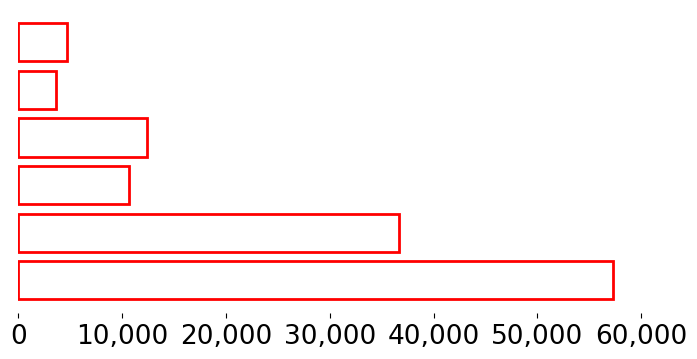

In [26]:
# values from original fetal skin object with ALL CELLS 
data = {'F35': 4661, 'F45': 3654, 'F51': 12435, 'F69': 10684, 'F220': 36692, 'F221': 57251}
keys = ['F35', 'F45', 'F51', 'F69', 'F220', 'F221']
values = [data[key] for key in keys]

plt.figure(figsize=(8, 4))
bars = plt.barh(keys, values, color='white', edgecolor='red', linewidth=2)
plt.gca().invert_yaxis()  
plt.gca().set_frame_on(False)   
plt.xticks(fontsize=19)   
plt.yticks([])  
plt.grid(False)  
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))


plt.show()

[ WARN:0@0.153] global loadsave.cpp:248 findDecoder imread_('/mnt/data/72DE2163-A887-4657-B5F7-539B65B891ED.png'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


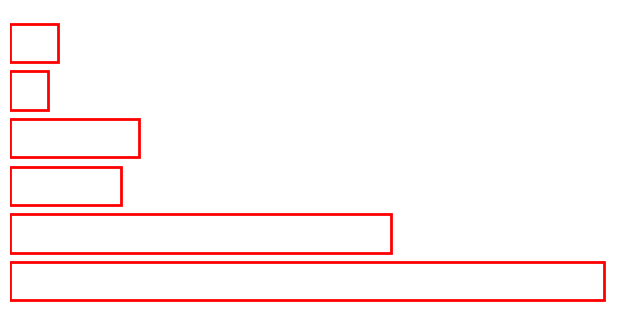

In [9]:
import matplotlib.pyplot as plt

# Data
data = {'F35': 4661, 'F45': 3654, 'F51': 12435, 'F69': 10684, 'F220': 36692, 'F221': 57251}

# Explicit bar order
keys = ['F35', 'F45', 'F51', 'F69', 'F220', 'F221']
values = [data[key] for key in keys]

# Plot settings
plt.figure(figsize=(8, 4))
bars = plt.barh(keys, values, color='white', edgecolor='red', linewidth=2)

# Minimalistic styling
plt.gca().invert_yaxis()  # Ensure the order matches the key list (top-to-bottom as in keys)
plt.gca().set_frame_on(False)  # Remove the plot frame
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

# Show the plot
plt.show()

In [5]:
stop

NameError: name 'stop' is not defined

In [ ]:
2

In [ ]:
adata.obs["lto"].unique()
adata_intestineccl19only = adata[adata.obs["lto"]=="mLTo_intestine"]
group_counts = adata_intestineccl19only.obs["DonorID"].value_counts()
adata_intestineccl19only.obs["DonorID_counts"] = adata_intestineccl19only.obs["DonorID"].apply(
    lambda x: f"{x} (n={group_counts[x]})"
)

sc.pl.dotplot(
    adata_intestineccl19only,
    lto_genes,
    groupby="DonorID_counts",
    vmax=1.1,
    colorbar_title='Mean expression\n(log1p norm)',
    dendrogram=False,
)


In [ ]:
adata_lesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated9.lesionalonly')


In [ ]:
sc.settings.set_figure_params(dpi=600, facecolor="white", frameon=False, figsize=(4,4))
adata_lesional2=adata_lesional[adata_lesional.obs["Patient_status"]=="HS"]
sc.pl.dotplot(
    adata_lesional2,
    ["CXCL13", "FDCSP"], cmap="Reds",
    groupby="test13",vmax=2,colorbar_title='Mean expression\n(log1p norm)',
    #tandard_scale="var", 
    dendrogram=False,
    save="cxcl13_hs.png",
        swap_axes=True,
    dot_max=0.5,

)   


In [ ]:
adata_lesional2=adata_lesional[adata_lesional.obs["Patient_status"]=="Sarcoidosis"]

sc.pl.dotplot(
    adata_lesional2,
    ["CXCL13", "FDCSP"], cmap="Reds",
    groupby="test13",vmax=2,colorbar_title='Mean expression\n(log1p norm)',
    #tandard_scale="var", 
    dendrogram=False,
    save="cxcl13_sarcoid.png",
        swap_axes=True,
    dot_max=0.4,

)   


In [ ]:
adata_lesional2=adata_lesional[adata_lesional.obs["Patient_status"]=="Acne"]

sc.pl.dotplot(
    adata_lesional2,
    ["CXCL13", "FDCSP"], cmap="Reds",
    groupby="test13",vmax=2,colorbar_title='Mean expression\n(log1p norm)',
    #tandard_scale="var", 
    dendrogram=False,
    save="cxcl13_acne.png",
        swap_axes=True,
    dot_max=0.4,

)   

